<a href="https://colab.research.google.com/github/ananyagupta-31/SENTIMENT_ANALYSIS-_WITH_NLP/blob/main/Sentiment_Analysis_with_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task_2:-
 Sentiment Analysis with NLP (TF-IDF + Logistic Regression)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load dataset: Sample IMDb dataset

In [ ]:
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)
df = df[['label', 'tweet']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({0: 'Negative', 1: 'Positive'})

# Text Preprocessing

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)           # remove URLs
    text = re.sub(r"@\w+", "", text)                      # remove mentions
    text = re.sub(r"[^a-zA-Z\s]", "", text)               # keep only letters
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text


#Avoid repeated NLTK downloads

In [ ]:
import nltk
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Split into train and test

In [ ]:
# 1. Clean text column
df['cleaned_text'] = df['text'].apply(clean_text)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42
)


# TF-IDF Vectorization

In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Word Frequency Visualization with WordCloud


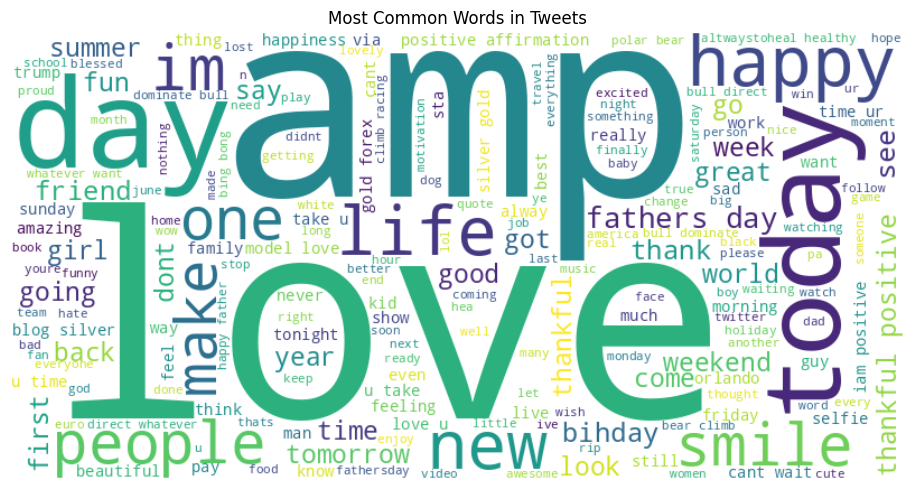

In [ ]:
from wordcloud import WordCloud  # pip install wordcloud if needed

text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets")
plt.tight_layout()
plt.savefig("wordcloud.png")  # 🖼️ add to README if uploading on GitHub
plt.show()


#Logistic Regression Classifier

In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)


# Evaluation

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      1.00      0.97      5937
    Positive       0.90      0.34      0.50       456

    accuracy                           0.95      6393
   macro avg       0.92      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



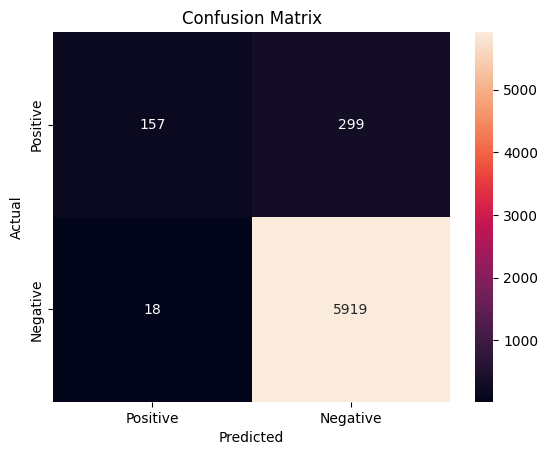

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Accuracy Score

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.95      1.00      0.97      5937
    Positive       0.90      0.34      0.50       456

    accuracy                           0.95      6393
   macro avg       0.92      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393

